In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## 1. Sıcaklık Tahmini
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [2]:
sicaklik = pd.read_csv("data/weatherHistory.csv")
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
sicaklik.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
Y = sicaklik['Apparent Temperature (C)']

X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 'Pressure (millibars)']]

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.55395113e+01 -3.22375796e-01  5.08683496e-03 -5.80345617e-04]
Sabit değer (bias): 
 40.08646279077777


In [7]:
X = sm.add_constant(X)

In [8]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.405
Method:                       Least Squares   F-statistic:                 1.639e+04
Date:                      Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                              21:18:39   Log-Likelihood:            -3.4044e+05
No. Observations:                     96453   AIC:                         6.809e+05
Df Residuals:                         96448   BIC:                         6.809e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.0865      0.265    151.491      0.000      39.568      40.605
Humidity                 -35.5395      0.140   -254.610      0.000     -35.813     -35.266
Wind Speed (km/h)         -0.3224      0.004    -81.150      0.000      -0.330      -0.315
Wind Bearing (degrees)     0.0051      0.000     20.435      0.000       0.005       0.006
Pressure (millibars)      -0.0006      0.000     -2.551      0.011      -0.001      -0.000
==============================================================================
Omnibus:                     3414.455   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3814.376
Skew:                          -0.465   Prob(JB):                         0.00
Kurtosis:                       3.291   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelin dogrusalligi icin yapacagimiz degerlendirmeler icin OLS isleminde eklenen sabit degerin degistirdigi Değişken sayılarıni duzeltmek icin X degerini eski haline getiriyoruz.**

In [9]:
Y = sicaklik['Apparent Temperature (C)']

X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 'Pressure (millibars)']]

In [10]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Hata Terimi Ortalamada sifir**

In [11]:
tahmin = lrm.predict(X)

In [12]:
X.shape

(96453, 4)

In [13]:
Y.shape

(96453,)

In [14]:
hatalar = Y-tahmin

print(" modelinin ortalama hatası : {:.50f}".format(np.mean(hatalar)))

 modelinin ortalama hatası : 0.00000000000000001896931712421861321620359955118700


Modelin hatalarının ortalaması sıfırdır

Hatalar grafikte serpildigi icin modelimiz dogrusaldir diyebiliriz. 


**Katsayilarda modelin dogrusalligi**

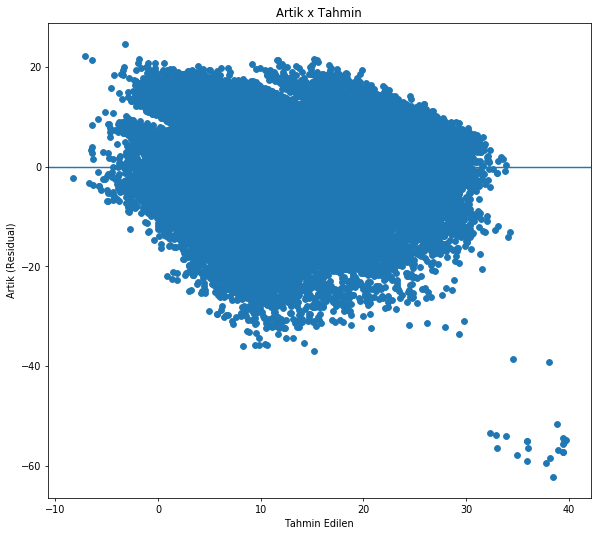

In [15]:
plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

Grafikte hata terimlerinin bir pattern izlemedigini goruyoruz. Modelimizin dogrusal oldugunu soyleyebiliriz.

**Homoscedasticity**

In [16]:
from scipy.stats import bartlett
from scipy.stats import levene

**Bartlett ve Levene**

In [17]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

In [18]:
print("Bartlett test değeri : {0:3g} ve p değeri : {1:.50f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.50f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 3575 ve p değeri : 0.00000000000000000000000000000000000000000000000000
Levene test değeri   : 3486.96 ve p değeri : 0.00000000000000000000000000000000000000000000000000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

**Dusuk Coklu Dogrusallik/low multicollineartiy**

In [19]:
corrArrayX = X.corr().values

In [20]:
np.linalg.eig(corrArrayX)

(array([1.2543905 , 0.74883167, 1.00689157, 0.98988627]),
 array([[-0.62551827,  0.63330178, -0.44054495,  0.11651563],
        [ 0.70437821,  0.70887549,  0.02581033,  0.02609035],
        [ 0.29313974, -0.28968094, -0.66908093,  0.61845351],
        [-0.16324008,  0.11184516,  0.59798385,  0.77669727]]))

Ilk array satirinda sifira yakin deger bulunmadigi icin multicollinearty'verilerin temiz oldugunu goruyoruz.

**Hata Terimleri birbirleriyle iliskisiz olmalidir.**

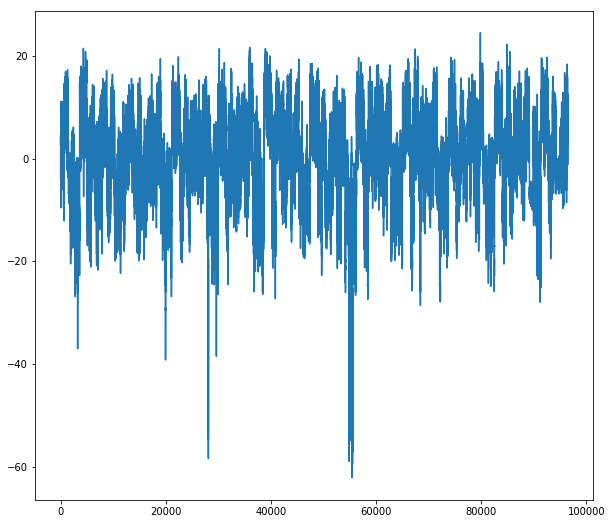

In [21]:
plt.figure(figsize=(10,9))
plt.plot(hatalar) 

Hata terimlerinin iliskisiz oldugunu goruyoruz. 

**Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır.**

In [22]:
from statsmodels.tsa.stattools import acf 

In [23]:
acf_data = acf(hatalar)

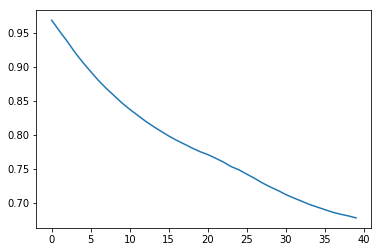

In [24]:
plt.plot(acf_data[1:])

Hata terimleri arasindaki otokorelasyon oldukca yuksektir.

**Ozellikler hatalarla iliskilendirilmemelidir.**

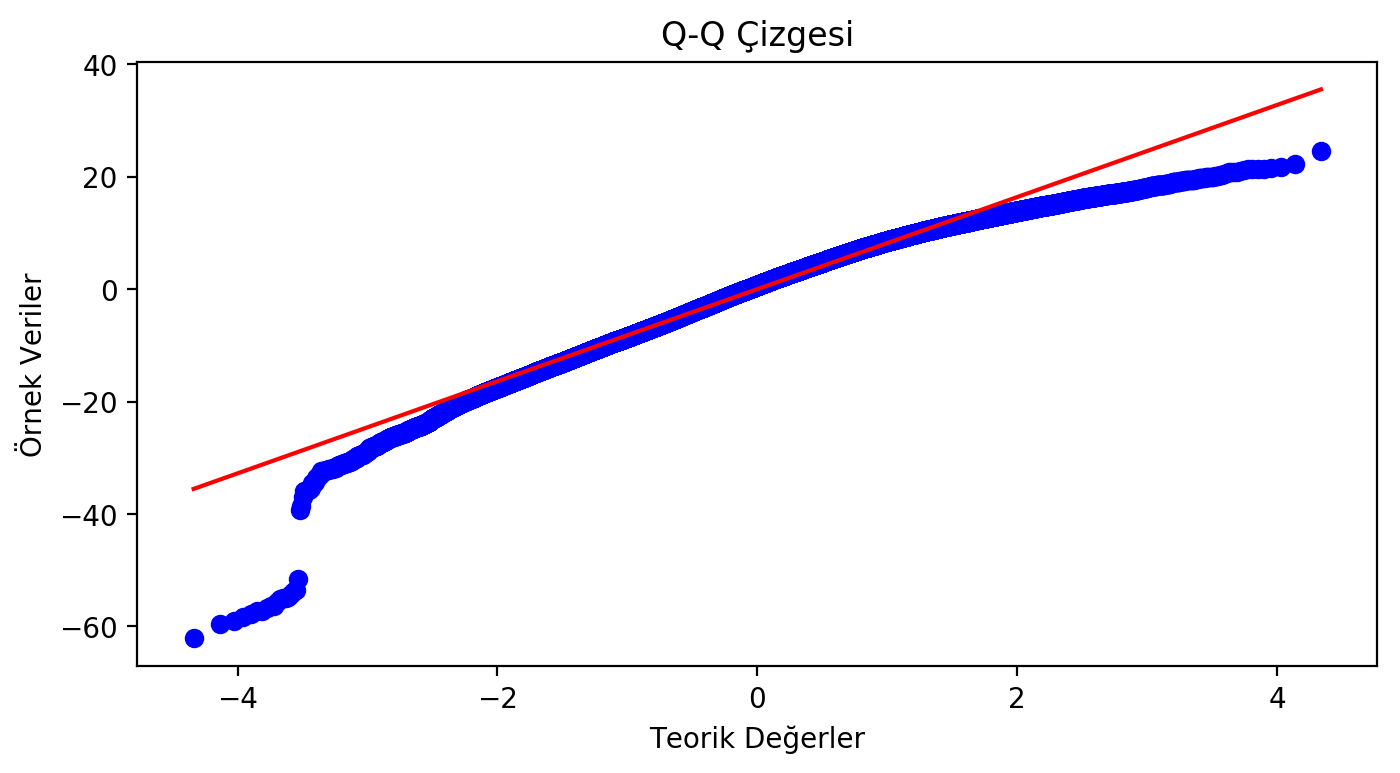

In [25]:
plt.figure(figsize=(8,4), dpi = 200)
nsample = 100
res = stats.probplot(hatalar, plot=plt)
plt.title("Q-Q Çizgesi")
plt.xlabel("Teorik Değerler")
plt.ylabel("Örnek Veriler")
plt.show()

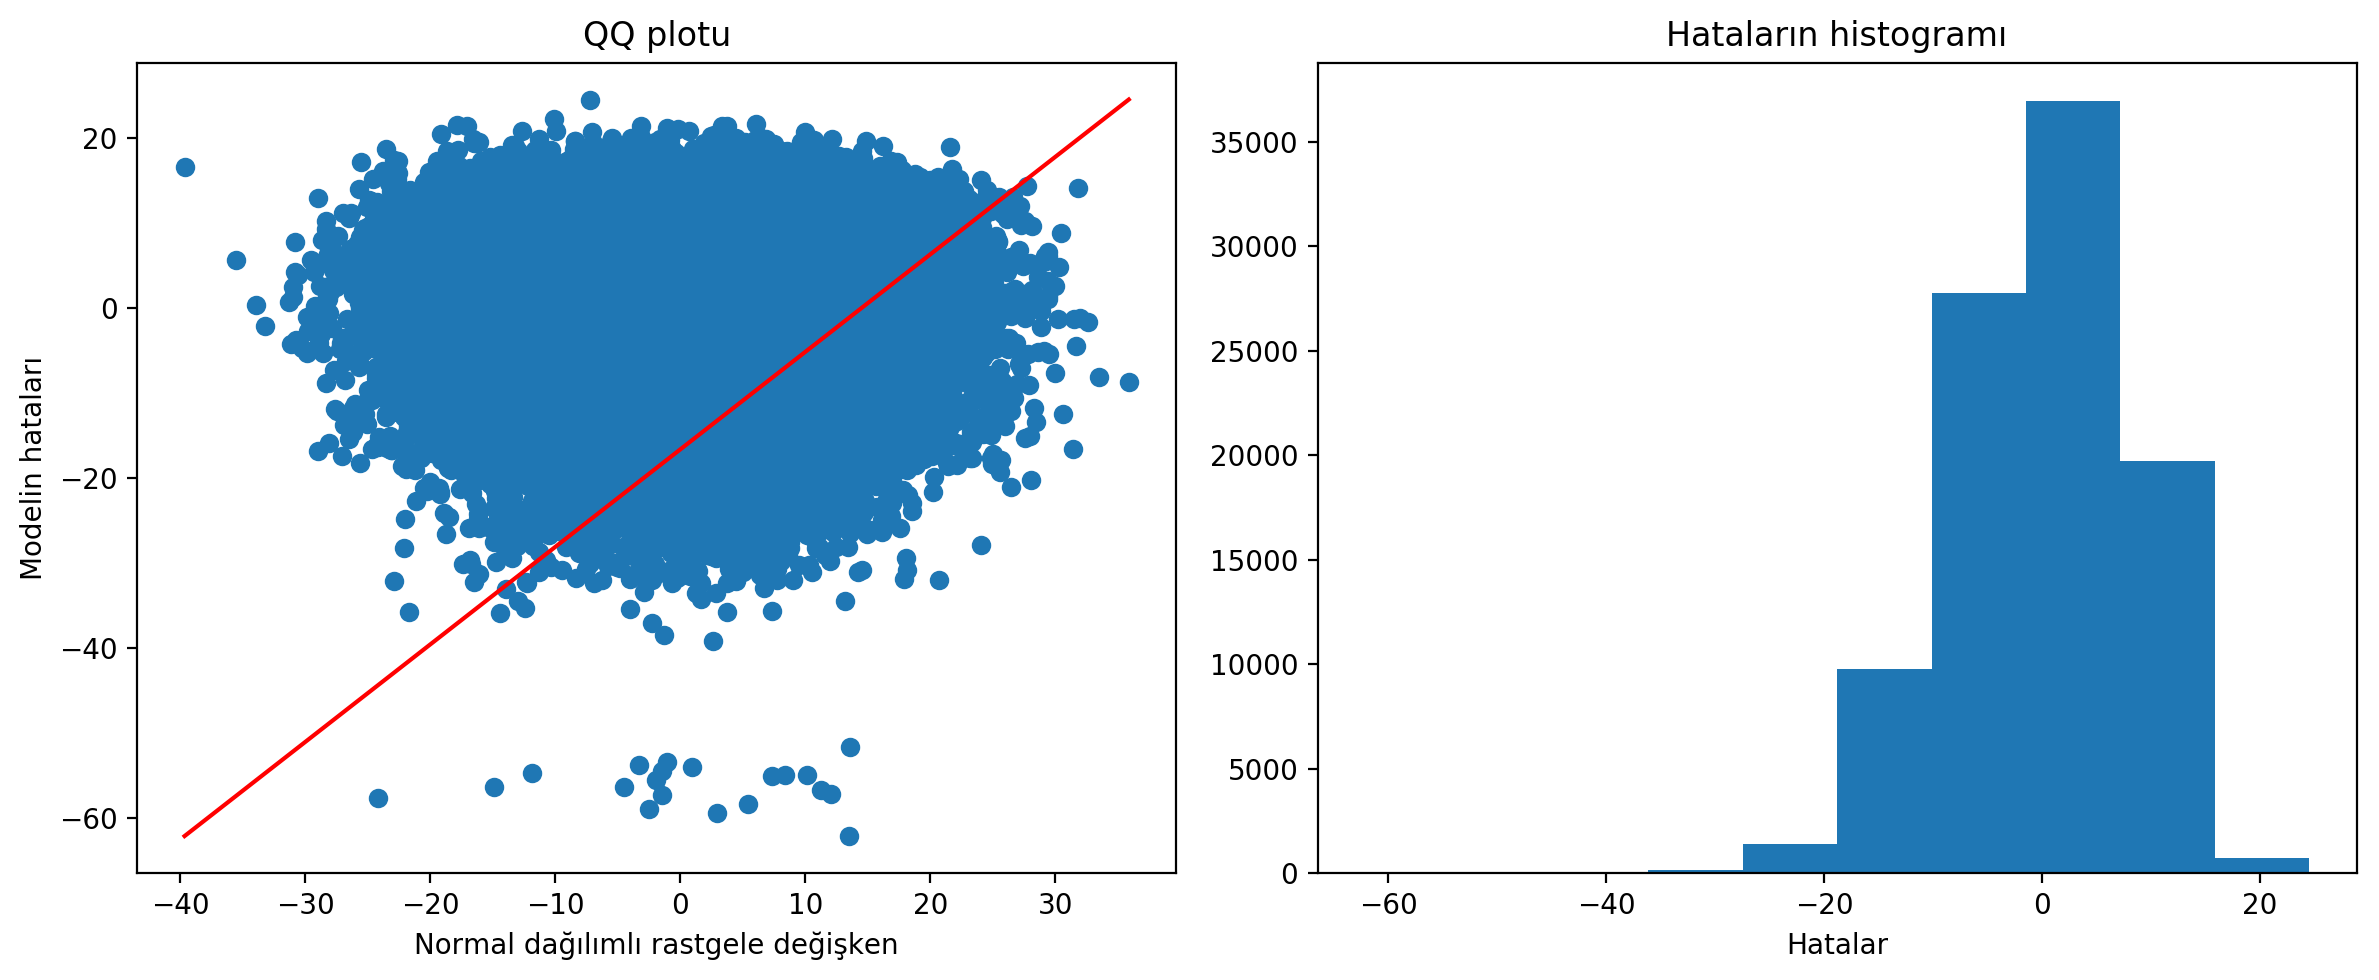

In [26]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5),  dpi = 200)

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.plot([np.min(rand_nums), np.max(rand_nums)],
         [np.min(hatalar), np.max(hatalar)], c='red')
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [28]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3814.3756067362347 ve p değeri : 0.0
Normal test değeri      : 3414.4549907100372  ve p değeri : 0.000000000000000000000000000000


Her iki test de hatalarimizin normal dagilmadigini gosterir. 